## K-최근접 이웃 알고리즘을 이용한 보스턴 주택 가격을 추론하는 회귀 실습

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
dataset = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
scaler = StandardScaler()

# StandardScaler이 fit 메서드를 이용해 학습 세트의 평균과 표준편차를 학습
scaler.fit(X_train)

# 위에서 학습된 평균과 표준편차를 이용해 X_train, X_test를 표준화(Normalization)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors = 5)

model.fit(X_train_std, y_train)

KNeighborsRegressor()

In [ ]:
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print('train_score : {0:.3f}, test_score : {1:.3f}'.format(train_score, test_score)) # 회귀는 정확도가 아니라 결정계수

train_score : 0.826, test_score : 0.808


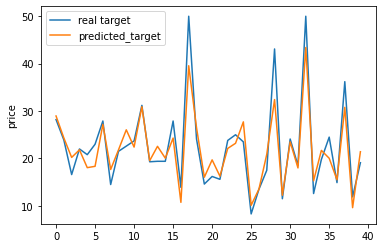

In [ ]:
y_predicted = model.predict(X_test_std)

number_of_sample = 40

plt.plot(range(number_of_sample), y_test[:number_of_sample], label = 'real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label = 'predicted_target')

plt.ylabel('price')
plt.legend()

plt.show()

In [ ]:
# n_neighbors = 10일 떄의 경우

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score, test_score)

0.758340009428429 0.7977421375608797


## 선형회귀를 사용한 보스턴 주택가격 예측

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
dataset = datasets.load_boston()

X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score, test_score)

0.7168057552393374 0.7789410172622859


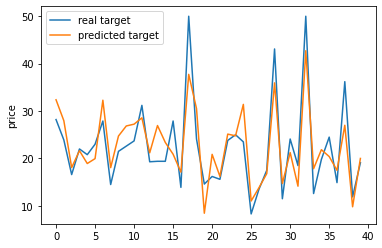

In [ ]:
y_predicted = model.predict(X_test_std)

number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label = 'real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label = 'predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# 션형 회귀에서 학습된 계수와 y절편을 확인
print('계수 : {cofficient}'.format(cofficient=model.coef_))
print()
print('y절편 : {y_intercept}'.format(y_intercept=model.intercept_))

계수 : [-1.07145146  1.34036243  0.26298069  0.66554537 -2.49842551  1.97524314
  0.19516605 -3.14274974  2.66736136 -1.80685572 -2.13034748  0.56172933
 -4.03223518]

y절편 : 22.344591029023768


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_std, y_train)

train_score = ridge.score(X_train_std, y_train)
test_score = ridge.score(X_test_std, y_test)

print(train_score, test_score)

0.7167789345572821 0.7789704562726603


## 로지스틱 회귀 실습(기초)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
X = np.array([[35], [50], [60], [65], [70], [85], [95]])
y = np.array([0, 0, 0, 0, 1, 1, 1])

In [ ]:
model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred)

[0 0 0 0 1 1 1]


In [ ]:
X_test = np.array([[45], [55], [75]])

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 1]


## 로지스틱 회귀 실습(위스콘신 유방암 데이터)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = datasets.load_breast_cancer()

X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()

model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score, test_score)

0.9906103286384976 0.9790209790209791


In [ ]:
# 이런 암 진단 같은 경우는 
# 1. 음성을 양성으로 오진하는 것은 환자의 생명에 직접적으로 영향을 주지는 않지만
# 2. 양성을 음성으로 오진하는 경우는 환자의 생명에 큰 위험을 줄 수 있기 때문에 아주 큰 문제가 생길 수 있다.

# 따라서 이런 문제에 사용되는 모델은 단순한 정확도보다는 양성 환자를 놓치지 않고 양성으로 진단하는 능력이 더 중요하다.

# 이때는 정확도(accuracy) 대신 재현율(recall)이라는 지표를 사용한다. 
# 다양한 성능 지표에 대해선 추후에 알아본다.

## 서포트 벡터 머신을 이용한 선형 분류 실습
그룹 사이의 공간, 마진을 최대화하는 경계를 찾는 알고리즘.

2차원 공간에는 1차원 형태의 직선을 경계로 하고 3차원 공간에서는 2차원 공간을 경계로 사용하는 등 공간의 차원이 클수록 경계의 차원도 같이 커지는 것이 특징이다.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
dataset = datasets.load_iris()

X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
model = LinearSVC(C=2.0) # C default = 0
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score, test_score)

0.9464285714285714 0.9736842105263158


## 서포트 벡터 머신을 이용한 비선형 분류 실습

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = RobustScaler()
X_train_rbs = scaler.fit_transform(X_train)
X_test_rbs = scaler.transform(X_test)

In [ ]:
model = SVC(kernel = 'rbf', gamma=1.0, C=1.0)
model.fit(X_train_rbs, y_train)

SVC(gamma=1.0)

In [ ]:
train_score = model.score(X_train_rbs, y_train)
test_score = model.score(X_test_rbs, y_test)

print(train_score, test_score)

0.9732142857142857 0.9736842105263158


In [ ]:
xgb_clf = xgboost.XGBClassifier(tree_method='gpu_hist',
                                predictor='gpu_predictor')

param_grid = {'max_depth':[3],
              'n_estimators':[50, 100]}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           # n_jobs=-1, -> cpu로 돌릴때만 필요
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_